<a href="https://colab.research.google.com/github/malikbaqi12/Applied-data-science-using-pyspark-code-files/blob/main/KDD_Steps_Vincent_Wen_(my_assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration, Preparation and Projection  #########

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=ec2577aab80c126eec49b0d1d8220b3300dadd0b6649ee4eb9911d6b487ff23e
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('basics').getOrCreate()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Reading the Income Dataset for Further Analysis
df = spark.read.csv('Income.csv',header=True,inferSchema=True)

In [4]:
# The show method allows you visualise DataFrames in a tabular format. 
pd.DataFrame(df.take(10), columns=df.columns)

,RecordID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
#Show some key details about the attributes
print(df.head(1))

[Row(RecordID=1, age=39, workclass='State-gov', fnlwgt=77516, education='Bachelors', education-num=13, marital-status='Never-married', occupation='Adm-clerical', relationship='Not-in-family', race='White', sex='Male', capital-gain=2174, capital-loss=0, hours-per-week=40, country='United-States', salary='<=50K')]


In [6]:
df.describe('age', 'education-num','hours-per-week').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,32561,38.58164675532078,13.640432553581356,17,90
education-num,32561,10.0806793403151,2.572720332067397,1,16
hours-per-week,32561,40.437455852092995,12.347428681731838,1,99


In [7]:
#Print Scheme
df.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- salary: string (nullable = true)



In [8]:
df.groupBy('salary').count().show()
df.groupBy('race').count().show()
df.groupBy('sex').count().show()

+------+-----+
|salary|count|
+------+-----+
| <=50K|24720|
|  >50K| 7841|
+------+-----+

+------------------+-----+
|              race|count|
+------------------+-----+
|             Other|  271|
|Amer-Indian-Eskimo|  311|
|             White|27816|
|Asian-Pac-Islander| 1039|
|             Black| 3124|
+------------------+-----+

+------+-----+
|   sex|count|
+------+-----+
|Female|10771|
|  Male|21790|
+------+-----+



In [9]:
#Drop the unwanted column
dropped_df = df.drop('fnlwgt')
dropped_df = dropped_df.na.drop()
dropped_df = dropped_df.drop('capital-loss')
dropped_df = dropped_df.drop('capital-gain')

In [10]:
df.describe().show()

+-------+-----------------+------------------+-----------+------------------+------------+-----------------+--------------+----------------+------------+------------------+------+------------------+----------------+------------------+----------+------+
|summary|         RecordID|               age|  workclass|            fnlwgt|   education|    education-num|marital-status|      occupation|relationship|              race|   sex|      capital-gain|    capital-loss|    hours-per-week|   country|salary|
+-------+-----------------+------------------+-----------+------------------+------------+-----------------+--------------+----------------+------------+------------------+------+------------------+----------------+------------------+----------+------+
|  count|            32561|             32561|      30725|             32561|       32561|            32561|         32561|           30718|       32561|             32561| 32561|             32561|           32561|             32561|     31

In [11]:
dropped_df.describe().show()

+-------+------------------+------------------+-----------+------------+------------------+--------------+----------------+------------+------------------+------+-----------------+----------+------+
|summary|          RecordID|               age|  workclass|   education|     education-num|marital-status|      occupation|relationship|              race|   sex|   hours-per-week|   country|salary|
+-------+------------------+------------------+-----------+------------+------------------+--------------+----------------+------------+------------------+------+-----------------+----------+------+
|  count|             30162|             30162|      30162|       30162|             30162|         30162|           30162|       30162|             30162| 30162|            30162|     30162| 30162|
|   mean|16288.103242490552|38.437901995888865|       null|        null| 10.12131158411246|          null|            null|        null|              null|  null|40.93123798156621|      null|  null|
| std

In [12]:
# Reclassify Label to Yes or No
dropped_df = dropped_df.withColumn('salary', regexp_replace('salary', '>50K', 'yes'))
dropped_df = dropped_df.withColumn('salary', regexp_replace('salary', '<=50K', 'no'))
dropped_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
RecordID,30162,16288.103242490552,9383.401676372081,1,32561
age,30162,38.437901995888865,13.134664776856017,17,90
workclass,30162,None,None,Federal-gov,Without-pay
education,30162,None,None,10th,Some-college
education-num,30162,10.12131158411246,2.5499949188567355,1,16
marital-status,30162,None,None,Divorced,Widowed
occupation,30162,None,None,Adm-clerical,Transport-moving
relationship,30162,None,None,Husband,Wife
race,30162,None,None,Amer-Indian-Eskimo,White


# Method Selection and Application

In [13]:
# Section must be included at the beginning of each new notebook. Remember to change the app name.
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml_application').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip3 install numpy --user' into the console.
# If you're getting an error with another package, type 'sudo pip3 install PACKAGENAME --user'. 
# Replace PACKAGENAME with the relevant package (such as pandas, etc).

#We already have our dataframe from above workings dropped_df and can ignore below
# # First, let's import the data. Note that we can infer the schema as it's a CSV file.
# df = spark.read.csv("Income.csv",inferSchema=True,header=True)

In [14]:
dropped_df = dropped_df.drop('RecordID')
dropped_df.describe('age', 'education-num','hours-per-week').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,30162,38.437901995888865,13.134664776856017,17,90
education-num,30162,10.12131158411246,2.5499949188567355,1,16
hours-per-week,30162,40.93123798156621,11.97998422927489,1,99


In [15]:
dropped_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- salary: string (nullable = true)



In [16]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
workclass_indexer = StringIndexer(inputCol='workclass',outputCol='workclassIndex')
education_indexer = StringIndexer(inputCol='education',outputCol='educationIndex')
marital_indexer = StringIndexer(inputCol='marital-status',outputCol='maritalIndex')
occupation_indexer = StringIndexer(inputCol='occupation',outputCol='occupationIndex')
relationship_indexer = StringIndexer(inputCol='relationship',outputCol='relationshipIndex')
race_indexer = StringIndexer(inputCol='race',outputCol='raceIndex')
sex_indexer = StringIndexer(inputCol='sex',outputCol='sexIndex')
country_indexer = StringIndexer(inputCol='country',outputCol='countryIndex')
salary_indexer = StringIndexer(inputCol='salary',outputCol='label')

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
workclass_encoder = OneHotEncoder(inputCol='workclassIndex',outputCol='workclassVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
marital_encoder = OneHotEncoder(inputCol='maritalIndex',outputCol='maritalVec')
occupation_encoder = OneHotEncoder(inputCol='occupationIndex',outputCol='occupationVec')
relationship_encoder = OneHotEncoder(inputCol='relationshipIndex',outputCol='relationshipVec')
race_encoder = OneHotEncoder(inputCol='raceIndex',outputCol='raceVec')
sex_encoder = OneHotEncoder(inputCol='sexIndex',outputCol='sexVec')
country_encoder = OneHotEncoder(inputCol='countryIndex',outputCol='countryVec')
label_encoder = OneHotEncoder(inputCol='label',outputCol='label')

# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['workclassVec','educationVec','maritalVec','occupationVec',
                                       'relationshipVec','raceVec','sexVec','countryVec',
                                       'age', 'hours-per-week', 'education-num'], outputCol="features")

In [17]:
## PIPELINE ##
from pyspark.ml import Pipeline

# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[workclass_indexer,education_indexer,marital_indexer,occupation_indexer,relationship_indexer,
                            race_indexer,sex_indexer,country_indexer,salary_indexer, workclass_encoder, education_encoder,marital_encoder, 
                            occupation_encoder, relationship_encoder, race_encoder, sex_encoder, country_encoder, assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(dropped_df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(dropped_df)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [18]:
pipe_df.describe()

DataFrame[summary: string, label: string]

# Training and Testing Dataset Split

In [19]:
## Split Data ##
# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 21134
Test Dataset Count: 9028


# Random Forest

In [20]:
#Iteration 1
from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=50)
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)


evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
#print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8069339831634914
Test set Precision = 0.8051312333457137
Test set Recall = 0.7754881815150143


In [21]:
#Iteration 2

from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=150)
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)

#Evaluation
evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
#print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8075985821887461
Test set Precision = 0.8053041644593939
Test set Recall = 0.7769054697655738


In [22]:
#Iteration 3

from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=300)
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)


evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
#print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8132476739034116
Test set Precision = 0.8079216239456641
Test set Recall = 0.7882671812596564


In [23]:
#predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)
#evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

# Naive Bayesian

In [24]:
#Iteration 1
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=0.0, modelType="multinomial")

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8046078865750997
Test set Precision = 0.821498696281259
Test set Recall = 0.810435904791385


In [25]:
print(model.explainParams)

<bound method Params.explainParams of NaiveBayesModel: uid=NaiveBayes_db1022ba5561, modelType=multinomial, numClasses=2, numFeatures=93>


In [26]:
#Iteration 2
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8044971200708906
Test set Precision = 0.8217453486711132
Test set Recall = 0.8104126373432511


In [27]:
#Iteration 3
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(modelType="multinomial", smoothing = 2.0)

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8042755870624723
Test set Precision = 0.8216133159324863
Test set Recall = 0.8102164513690504


# Logistic Regression

Training Dataset Count: 21073
Test Dataset Count: 9089
Test set Accuracy = 0.7577291231158543
Test set Precision = 0.7773036849293293
Test set Recall = 0.6597605423210501


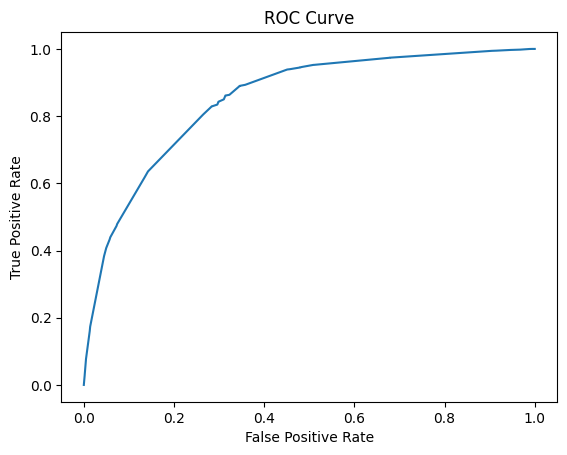

Area Under the Curve: 0.849312015384642


In [28]:
##Iteration1##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label',maxIter=100, regParam=0.1, elasticNetParam=0.8)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
### ROC CURVE ###

# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))


Training Dataset Count: 21083
Test Dataset Count: 9079
Test set Accuracy = 0.8276241876858685
Test set Precision = 0.8175861042132231
Test set Recall = 0.8142347318803831


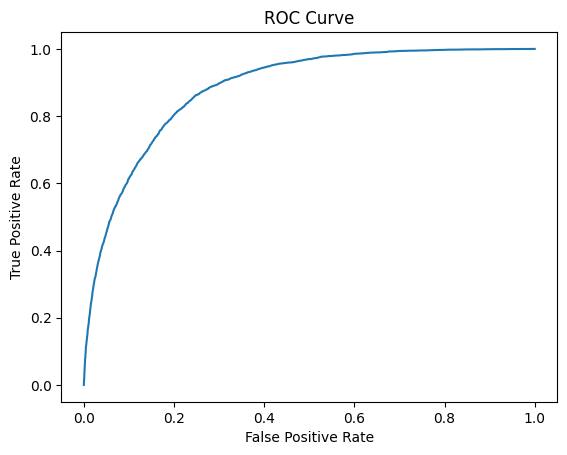

Area Under the Curve: 0.883411620728361


In [29]:
##Iteration2##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label',maxIter=200, regParam=0.1, elasticNetParam=0)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
### ROC CURVE ###

# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

Training Dataset Count: 21104
Test Dataset Count: 9058
Test set Accuracy = 0.8304261426363435
Test set Precision = 0.8223581617108323
Test set Recall = 0.8231254854526739


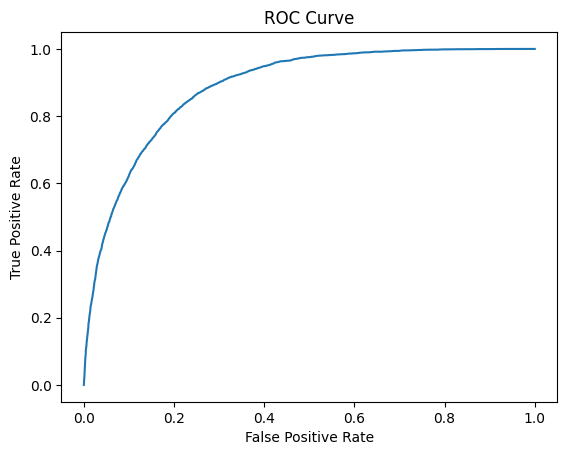

Area Under the Curve: 0.8868971731136595


In [30]:
##Iteration3##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label', maxIter=100, regParam=0, elasticNetParam=0.8)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
### ROC CURVE ###

# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Interpretation

In [31]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('basics').getOrCreate()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_csv('Income.csv')

In [33]:
df.isna().sum()

RecordID             0
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [34]:
df = df.dropna()

In [35]:
df['salary']=df['salary'].map({'<=50K': 0, '>50K': 1, '<=50K.': 'No', '>50K.': 'Yes'})

<ipython-input-35-90fcf11aea55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary']=df['salary'].map({'<=50K': 0, '>50K': 1, '<=50K.': 'No', '>50K.': 'Yes'})


In [36]:
df.head(4)

,RecordID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [37]:
female = df[df.sex == 'Female']
male = df[df.sex == 'Male']

In [38]:
# Identify Numeric features
numeric_features = ['age','education-num','hours-per-week','salary']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native']

<Axes: ylabel='count'>

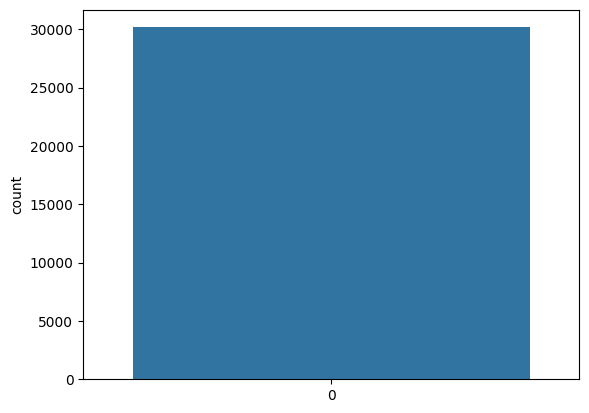

In [39]:
sns.countplot(df['salary'],label="Count")

In [40]:
female.head(2)

,RecordID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


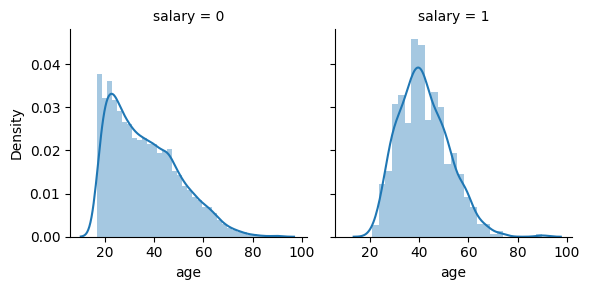

In [41]:
# Explore Age vs Income
g = sns.FacetGrid(female, col='salary')
g = g.map(sns.distplot, "age")

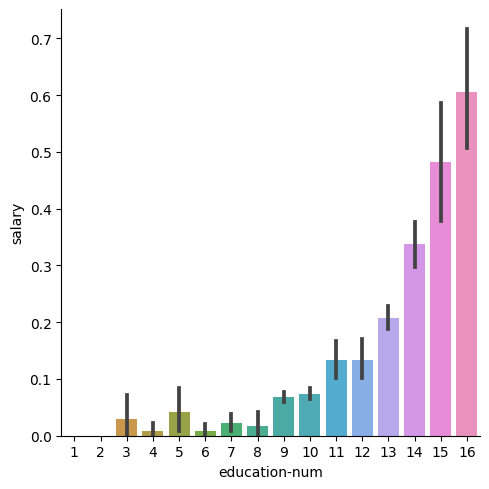

In [42]:
sns.catplot(x="education-num", y="salary", data=female, kind="bar")
# g.despine(left=True)
# g = g.set_ylabels("Percentage Over 50K Income - Female")

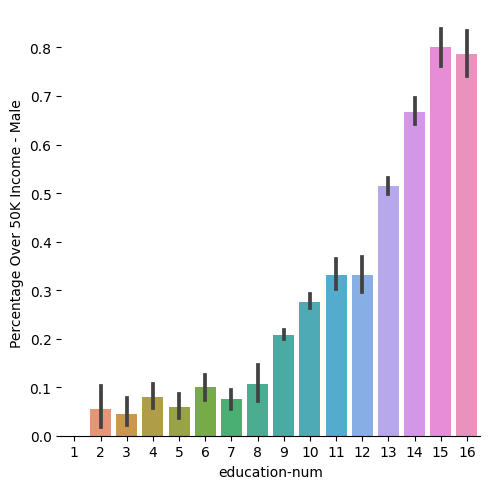

In [43]:
g = sns.catplot(x="education-num", y="salary", data=male, kind="bar")
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income - Male")

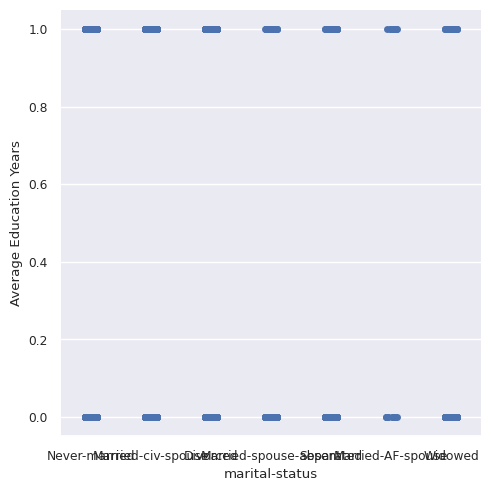

In [44]:
sns.set(font_scale=0.8)
g = sns.catplot(x="marital-status",y="salary", data=df)
g.despine(left=True)
g = g.set_ylabels("Average Education Years")

# Feature Importance

In [45]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
workclass_indexer = StringIndexer(inputCol='workclass',outputCol='workclassIndex')
education_indexer = StringIndexer(inputCol='education',outputCol='educationIndex')
marital_indexer = StringIndexer(inputCol='marital-status',outputCol='maritalIndex')
occupation_indexer = StringIndexer(inputCol='occupation',outputCol='occupationIndex')
#relationship_indexer = StringIndexer(inputCol='relationship',outputCol='relationshipIndex')
race_indexer = StringIndexer(inputCol='race',outputCol='raceIndex')
sex_indexer = StringIndexer(inputCol='sex',outputCol='sexIndex')
country_indexer = StringIndexer(inputCol='country',outputCol='countryIndex')
salary_indexer = StringIndexer(inputCol='salary',outputCol='label')

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
workclass_encoder = OneHotEncoder(inputCol='workclassIndex',outputCol='workclassVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
marital_encoder = OneHotEncoder(inputCol='maritalIndex',outputCol='maritalVec')
occupation_encoder = OneHotEncoder(inputCol='occupationIndex',outputCol='occupationVec')
#relationship_encoder = OneHotEncoder(inputCol='relationshipIndex',outputCol='relationshipVec')
race_encoder = OneHotEncoder(inputCol='raceIndex',outputCol='raceVec')
sex_encoder = OneHotEncoder(inputCol='sexIndex',outputCol='sexVec')
country_encoder = OneHotEncoder(inputCol='countryIndex',outputCol='countryVec')
label_encoder = OneHotEncoder(inputCol='label',outputCol='label')

#,'relationshipVec'
# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['workclassVec','educationVec','maritalVec','occupationVec',
                                       'raceVec','sexVec','countryVec',
                                       'age', 'hours-per-week', 'education-num'], outputCol="features")

In [46]:
## PIPELINE ##
from pyspark.ml import Pipeline

#relationship_encoder,
# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[workclass_indexer,education_indexer,marital_indexer,relationship_indexer,
                            race_indexer,sex_indexer,occupation_indexer, country_indexer,salary_indexer, workclass_encoder, education_encoder,marital_encoder, 
                            race_encoder, sex_encoder, occupation_encoder, country_encoder, assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(dropped_df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(dropped_df)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [47]:
## Split Data ##
# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 21211
Test Dataset Count: 8951


In [48]:
##Iteration3##
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label', maxIter=100, regParam=0, elasticNetParam=0.8)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator1.evaluate(predictions)
print("Test set Accuracy = " + str(accuracy))

Test set Accuracy = 0.8300748519718467
